In [52]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as sts
import matplotlib.pyplot as plt
import sklearn
warnings.filterwarnings("ignore")

In [53]:
df_weather = pd.read_excel("London Excel.xlsx")
df_weather.head()

,Местное время в Лондон-Сити (аэропорт),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td
0,2023-08-31 23:50:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",3,NaN,NaN,NaN,Незначительная (10-30%) 270 м,10.0 и более,13.0
1,2023-08-31 23:20:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,Незначительная (10-30%) 270 м,10.0 и более,13.0
2,2023-08-31 22:50:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,"Рассеянная (40-50%) 270 м, рассеянная (40-50%)...",10.0 и более,13.0
3,2023-08-31 22:20:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,"Рассеянная (40-50%) 300 м, разорванная (60-90%...",10.0 и более,13.0
4,2023-08-31 21:50:00,15.0,757.3,757.7,88,"Ветер, дующий с юго-юго-востока",3,NaN,NaN,NaN,"Разорванная (60-90%) 270 м, разорванная (60-90...",10.0 и более,13.0


In [54]:
df_weather.columns

Index(['Местное время в Лондон-Сити (аэропорт)', 'T', 'P0', 'P', 'U', 'DD',
       'Ff', 'ff10', 'WW', 'W'W'', 'c', 'VV', 'Td'],
      dtype='object')

In [55]:
df_weather["WW"].value_counts()

Слабый(ая)(ые) дождь            70
Мгла                            11
Слабый(ая)(ые) морось            5
Дождь, морось                    5
Дождь                            4
Вблизи гроза                     2
Дымка                            2
Гроза                            1
Сильный(ая)(ые) дождь            1
Слабый(ая)(ые) дождь, морось     1
Name: WW, dtype: int64

In [56]:
df_weather["W'W'"].value_counts()

Дождь                                   17
Дождь, морось                            8
Морось                                   4
Гроза, гроза, дождь, дождь               1
Ливень (ливни), дождь, дождь, морось     1
Name: W'W', dtype: int64

In [57]:
df_weather['Start date'] = pd.to_datetime(df_weather['Местное время в Лондон-Сити (аэропорт)'])
df_weather['Start date'] = df_weather['Start date'].dt.strftime('%m.%d.%Y %H:%M')
start_date_column = df_weather["Start date"]
df_weather.drop(columns = "Местное время в Лондон-Сити (аэропорт)")
df_weather.insert(0, 'Start Date', start_date_column)
df_weather["Temperature"] = df_weather["T"]

In [58]:
df_weather["Start date"] = df_weather["Местное время в Лондон-Сити (аэропорт)"]
df_weather['Start Date'] = pd.to_datetime(df_weather['Start date'], format='%m.%d.%Y %H:%M')
df_weather['Start date'] = df_weather['Start date'].dt.strftime('%m.%d.%Y %H:%M')
df_weather

,Start Date,Местное время в Лондон-Сити (аэропорт),T,P0,P,U,DD,Ff,ff10,WW,W'W',c,VV,Td,Start date,Temperature
0,2023-08-31 23:50:00,2023-08-31 23:50:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",3,NaN,NaN,NaN,Незначительная (10-30%) 270 м,10.0 и более,13.0,08.31.2023 23:50,15.0
1,2023-08-31 23:20:00,2023-08-31 23:20:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,Незначительная (10-30%) 270 м,10.0 и более,13.0,08.31.2023 23:20,15.0
2,2023-08-31 22:50:00,2023-08-31 22:50:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,"Рассеянная (40-50%) 270 м, рассеянная (40-50%)...",10.0 и более,13.0,08.31.2023 22:50,15.0
3,2023-08-31 22:20:00,2023-08-31 22:20:00,15.0,757.3,757.7,88,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,NaN,"Рассеянная (40-50%) 300 м, разорванная (60-90%...",10.0 и более,13.0,08.31.2023 22:20,15.0
4,2023-08-31 21:50:00,2023-08-31 21:50:00,15.0,757.3,757.7,88,"Ветер, дующий с юго-юго-востока",3,NaN,NaN,NaN,"Разорванная (60-90%) 270 м, разорванная (60-90...",10.0 и более,13.0,08.31.2023 21:50,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,2023-08-01 02:20:00,2023-08-01 02:20:00,15.0,750.4,750.8,88,"Ветер, дующий с западо-юго-запада",6,NaN,NaN,NaN,Рассеянная (40-50%) 360 м,10.0 и более,13.0,08.01.2023 02:20,15.0
1473,2023-08-01 01:50:00,2023-08-01 01:50:00,16.0,750.4,750.8,83,"Ветер, дующий с западо-юго-запада",6,NaN,NaN,NaN,Незначительная (10-30%) 390 м,10.0 и более,13.0,08.01.2023 01:50,16.0
1474,2023-08-01 01:20:00,2023-08-01 01:20:00,16.0,750.4,750.8,83,"Ветер, дующий с западо-юго-запада",7,NaN,NaN,NaN,Рассеянная (40-50%) 420 м,10.0 и более,13.0,08.01.2023 01:20,16.0
1475,2023-08-01 00:50:00,2023-08-01 00:50:00,16.0,750.4,750.8,83,"Ветер, дующий с западо-юго-запада",6,NaN,NaN,NaN,Незначительная (10-30%) 510 м,10.0 и более,13.0,08.01.2023 00:50,16.0


In [59]:
# В колонках WW и W'W' содержатся данные о дожде. Добавим категориальную переменную

df_weather[['WW', "W'W'"]] = df_weather[['WW', "W'W'"]].fillna(0)
df_weather['is_rain'] = (df_weather[['WW', "W'W'"]] != 0).any(axis=1).astype(int)
df_weather["is_rain"].value_counts()

0    1366
1     111
Name: is_rain, dtype: int64

In [60]:
# оставим в датасете с погодой только необходимое
df_weather = df_weather.loc[:, ['Start date', 'T', 'is_rain']]

In [61]:
df_weather

,Start date,T,is_rain
0,08.31.2023 23:50,15.0,0
1,08.31.2023 23:20,15.0,0
2,08.31.2023 22:50,15.0,0
3,08.31.2023 22:20,15.0,0
4,08.31.2023 21:50,15.0,0
...,...,...,...
1472,08.01.2023 02:20,15.0,0
1473,08.01.2023 01:50,16.0,0
1474,08.01.2023 01:20,16.0,0
1475,08.01.2023 00:50,16.0,0


Выше получили дальнейший датасет погоды, с которым будем работать.

In [62]:
## Поработаем с данным
df = pd.read_csv("LondonBikeJourneyAug2023.csv", sep=';')
df['Start date'] = pd.to_datetime(df['Start date'], errors='coerce')
df['Start date'] = df['Start date'].dt.strftime('%m.%d.%Y %H:%M')
df.dropna(inplace = True)
df

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms)
0,132825189,08.01.2023 00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663
1,132825190,08.01.2023 00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128
2,132825191,08.01.2023 00:00,983,"Euston Road, Euston",08.01.2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395
3,132825192,08.01.2023 00:01,3479,"Old Brompton Road, South Kensington",08.01.2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059
4,132825193,08.01.2023 00:01,1219,"Lower Marsh, Waterloo",08.01.2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786
...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,08.31.2023 23:59,988,"Great Russell Street, Bloomsbury",09.01.2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884
776523,133624571,08.31.2023 23:59,2660,"Frith Street, Soho",09.01.2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204
776524,133624572,08.31.2023 23:59,200190,"Queen's Circus, Battersea Park",09.01.2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554
776525,133624573,08.31.2023 23:59,959,"Milroy Walk, South Bank",09.01.2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132


In [ ]:
from tqdm import tqdm # этот цикл будет выполняться примерно 1.5 часа, поэтому попробуем более эффективно смерджить данные

df_weather['Start date'] = pd.to_datetime(df_weather['Start date'], format='%m.%d.%Y %H:%M')
df['Start date'] = pd.to_datetime(df['Start date'], format='%m.%d.%Y %H:%M')

df_weather['Start date'] = pd.to_datetime(df_weather['Start date'], format='%m.%d.%Y %H:%M')
df['Temperature'] = None
df['is_rain'] = None
for index, row in tqdm(df.iterrows(), total=len(df)):
    trip_time = row['Start date']
    nearest_weather = df_weather.loc[df_weather['Start date'].sub(trip_time).abs().idxmin()]
    df.at[index, 'Temperature'] = nearest_weather['T']
    df.at[index, 'is_rain'] = nearest_weather['is_rain']

df

In [63]:
df_weather['Start date'] = pd.to_datetime(df_weather['Start date'], format='%m.%d.%Y %H:%M')
df['Start date'] = pd.to_datetime(df['Start date'], format='%m.%d.%Y %H:%M')

df_weather_sorted = df_weather.sort_values(by='Start date')
df_trips = pd.merge_asof(df, df_weather_sorted, left_on='Start date', right_on='Start date', direction='nearest')
df_trips

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),T,is_rain
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,16.0,0
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,16.0,0
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",08.01.2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,16.0,0
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",08.01.2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,16.0,0
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",08.01.2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,2023-08-31 23:59:00,988,"Great Russell Street, Bloomsbury",09.01.2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884,15.0,0
776523,133624571,2023-08-31 23:59:00,2660,"Frith Street, Soho",09.01.2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204,15.0,0
776524,133624572,2023-08-31 23:59:00,200190,"Queen's Circus, Battersea Park",09.01.2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554,15.0,0
776525,133624573,2023-08-31 23:59:00,959,"Milroy Walk, South Bank",09.01.2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132,15.0,0


В целом, долгая обработка файлов завершена, в дальнейшем будем работать с merged_df

In [64]:
# Начнем осмотр данных и визуализацию, проверим пропуски

df_trips.isna().sum() # -> пропусков нет

Number                  0
Start date              0
Start station number    0
Start station           0
End date                0
End station number      0
End station             0
Bike number             0
Bike model              0
Total duration          0
Total duration (ms)     0
T                       0
is_rain                 0
dtype: int64

In [65]:
# Посчитаем среднее значение, посмотрим стандартное отклонение температуры

mean_temperature = df_weather['T'].mean()
std_temperature = df_weather['T'].std()

print("Среднее значение температуры:", round(mean_temperature, 2))
print("Стандартное отклонение температуры:", round(std_temperature,2))

Среднее значение температуры: 18.55
Стандартное отклонение температуры: 3.12


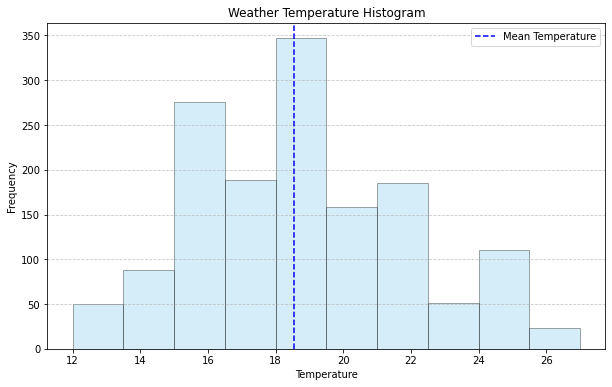

In [66]:
# Посмотрим распределение температуры за август по всем поездкам, также отметим на графике среднее значение

plt.figure(figsize=(10, 6))
plt.hist(df_weather['T'], bins=10, color='skyblue', edgecolor ='black', alpha = 0.35)
plt.axvline(x = mean_temperature, color='blue', linestyle='--', label='Mean Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Weather Temperature Histogram')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() # -> Вывод: распределение стремится к нормальному

In [67]:
# Посмотрим, сколько поездок было в дождливую погоду
df_trips["is_rain"].value_counts()

0    736053
1     40474
Name: is_rain, dtype: int64

Видим, что примерно 40 тысяч поездок (примерно 6% от всех поездок) были во время дождя

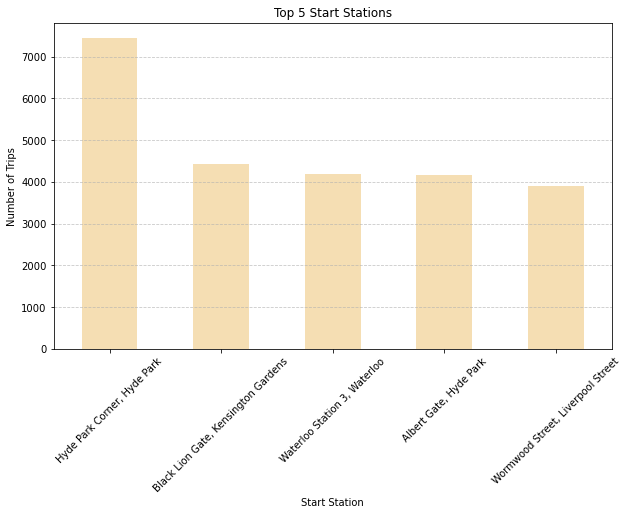

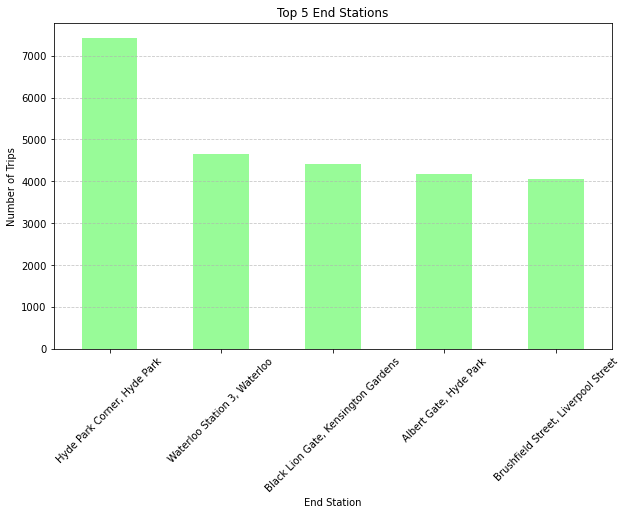

In [68]:
# Свизуализируем топ-5 станций, с которых берут байки, а также топ-5 станций, на которых оставляют байки

start_station_counts = df_trips['Start station'].value_counts().head(5)
end_station_counts = df_trips['End station'].value_counts().head(5)

plt.figure(figsize=(10, 6))
start_station_counts.plot(kind='bar', color='wheat')
plt.xlabel('Start Station')
plt.ylabel('Number of Trips')
plt.title('Top 5 Start Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(10, 6))
end_station_counts.plot(kind='bar', color='palegreen')
plt.xlabel('End Station')
plt.ylabel('Number of Trips')
plt.title('Top 5 End Stations')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

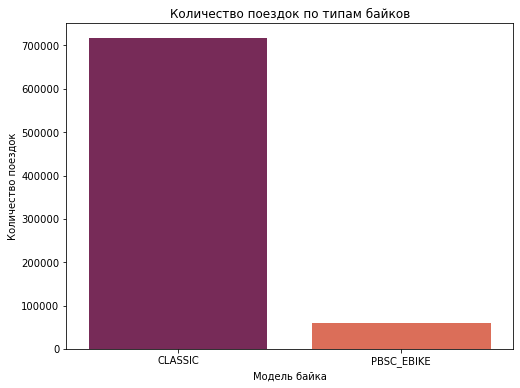

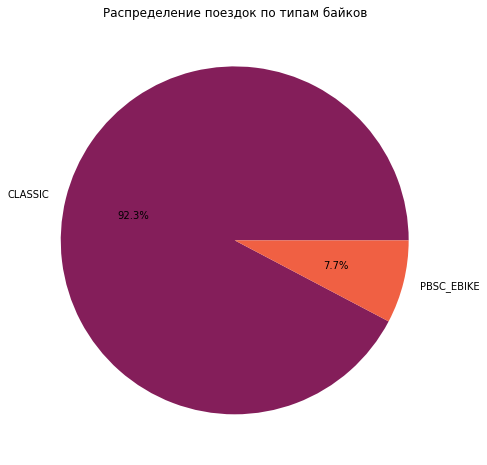

In [69]:
import seaborn as sns
bike_counts = df_trips['Bike model'].value_counts()

# Визуализация с помощью столбчатой диаграммы
plt.figure(figsize=(8, 6))
sns.barplot(x=bike_counts.index, y=bike_counts.values, palette='rocket')
plt.title('Количество поездок по типам байков')
plt.xlabel('Модель байка')
plt.ylabel('Количество поездок')
plt.show()

# Визуализация с помощью круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(bike_counts, labels=bike_counts.index, autopct='%1.1f%%', colors=sns.color_palette('rocket', len(bike_counts)))
plt.title('Распределение поездок по типам байков')
plt.show()

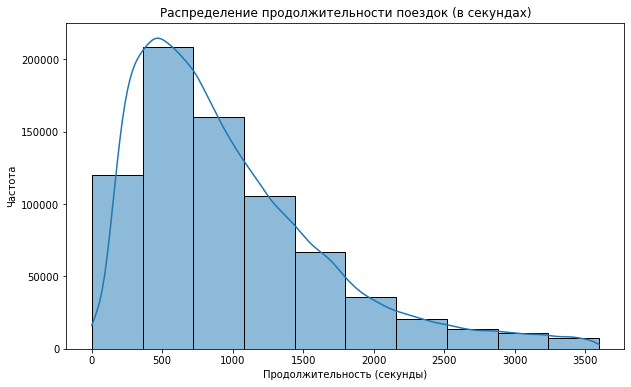

In [70]:
import re
def convert_to_seconds(duration):
    match = re.match(r'(?:(\d+)m)?\s*(\d+)s', duration)
    if match:
        minutes = int(match.group(1)) if match.group(1) else 0
        seconds = int(match.group(2))
        return minutes * 60 + seconds
    else:
        return None

# Применяем функцию ко всем значениям колонки
df_trips['Total duration, sec'] = df_trips['Total duration'].apply(convert_to_seconds)

# Удаляем строки с None (если такие есть)
df_trips = df_trips.dropna(subset=['Total duration, sec'])

# Визуализация с помощью гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(df_trips['Total duration, sec'], bins=10, kde=True)
plt.title('Распределение продолжительности поездок (в секундах)')
plt.xlabel('Продолжительность (секунды)')
plt.ylabel('Частота')
plt.show()

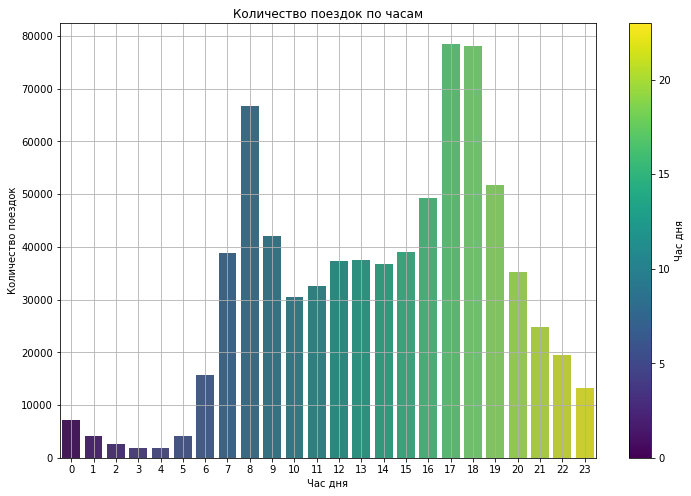

In [71]:
df_trips['Hour'] = df_trips['Start date'].dt.hour

hourly_counts = df_trips['Hour'].value_counts().sort_index()

palette = sns.color_palette("viridis", n_colors=24)

plt.figure(figsize=(12, 8))
bars = sns.barplot(x=hourly_counts.index, y=hourly_counts.values, palette=palette)
plt.title('Количество поездок по часам')
plt.xlabel('Час дня')
plt.ylabel('Количество поездок')
plt.xticks(range(0, 24))

sm = plt.cm.ScalarMappable(cmap="viridis", norm=plt.Normalize(vmin=0, vmax=23))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Час дня')

plt.grid(True)
plt.show()

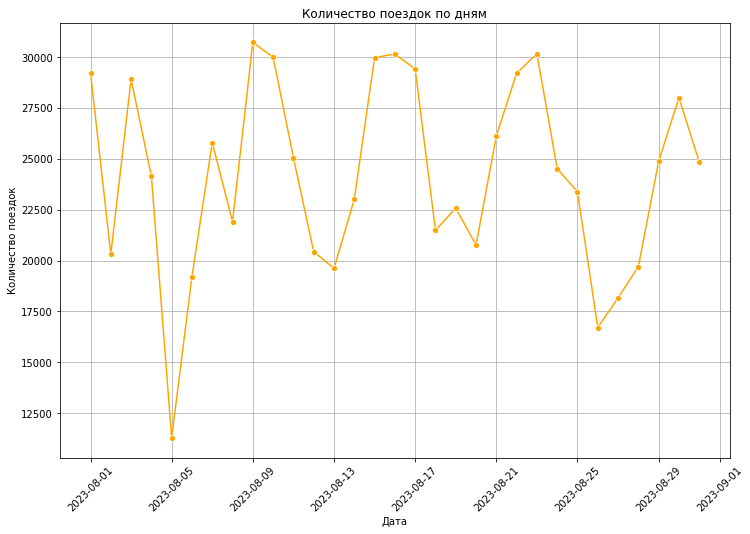

In [72]:
df_trips['Date'] = df_trips['Start date'].dt.date

# Подсчитываем количество поездок для каждой даты
daily_counts = df_trips['Date'].value_counts().sort_index()

# Визуализация с помощью линейного графика
plt.figure(figsize=(12, 8))
sns.lineplot(x=daily_counts.index, y=daily_counts.values, marker='o', color = 'orange')
plt.title('Количество поездок по дням')
plt.xlabel('Дата')
plt.ylabel('Количество поездок')
plt.xticks(rotation=45)  # Поворот меток на оси X для лучшей читаемости
plt.grid(True)
plt.show()

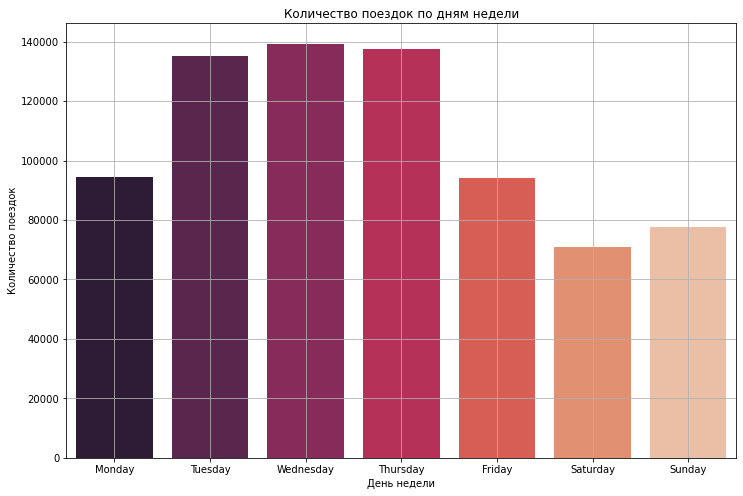

In [73]:
df_trips['Day of Week'] = df_trips['Start date'].dt.day_name()

# Подсчитываем количество поездок для каждого дня недели
weekly_counts = df_trips['Day of Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Визуализация с помощью столбчатого графика
plt.figure(figsize=(12, 8))
sns.barplot(x=weekly_counts.index, y=weekly_counts.values, palette='rocket')
plt.title('Количество поездок по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество поездок')
plt.grid(True)
plt.show()

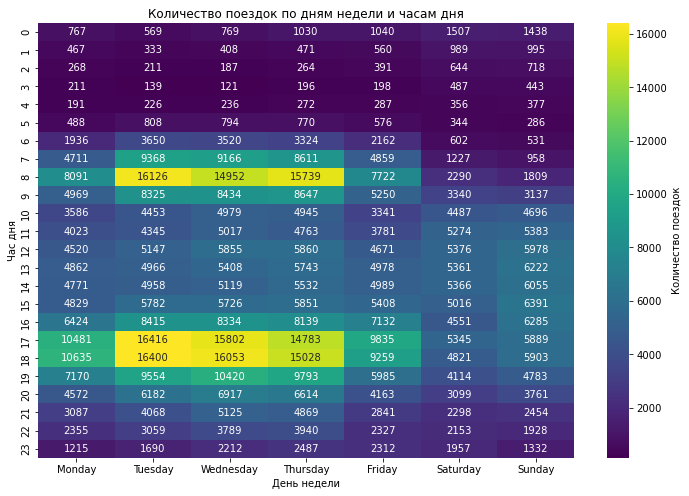

In [74]:
df_trips['Day of Week'] = df_trips['Start date'].dt.day_name()
df_trips['Hour'] = df_trips['Start date'].dt.hour

# Создаем сводную таблицу
heatmap_data = df_trips.pivot_table(index='Hour', columns='Day of Week', aggfunc='size', fill_value=0)

# Упорядочиваем столбцы по дням недели
heatmap_data = heatmap_data[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# Визуализация с помощью тепловой карты
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt="d", cbar_kws={'label': 'Количество поездок'})
plt.title('Количество поездок по дням недели и часам дня')
plt.xlabel('День недели')
plt.ylabel('Час дня')
plt.show()

# Визуализация окончена. Попробуем сгенерировать новых признаков для дальнейшего ML.

In [75]:
df_trips

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),T,is_rain,"Total duration, sec",Hour,Date,Day of Week
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,16.0,0,1006.0,0,2023-08-01,Tuesday
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,16.0,0,1007.0,0,2023-08-01,Tuesday
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",08.01.2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,16.0,0,666.0,0,2023-08-01,Tuesday
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",08.01.2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,16.0,0,713.0,0,2023-08-01,Tuesday
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",08.01.2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,16.0,0,963.0,0,2023-08-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,2023-08-31 23:59:00,988,"Great Russell Street, Bloomsbury",09.01.2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884,15.0,0,1320.0,23,2023-08-31,Thursday
776523,133624571,2023-08-31 23:59:00,2660,"Frith Street, Soho",09.01.2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204,15.0,0,662.0,23,2023-08-31,Thursday
776524,133624572,2023-08-31 23:59:00,200190,"Queen's Circus, Battersea Park",09.01.2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554,15.0,0,818.0,23,2023-08-31,Thursday
776525,133624573,2023-08-31 23:59:00,959,"Milroy Walk, South Bank",09.01.2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132,15.0,0,420.0,23,2023-08-31,Thursday


In [76]:
# Добавим бинарную переменную Start time, в которой будет стоять 0, если велосипед взят ночью и 1, если днем.

daytime_start = pd.to_datetime('6:00:00').time()
daytime_end = pd.to_datetime('18:00:00').time()

# Создаем бинарную переменную "Start time"
df_trips['Start time'] = df_trips['Start date'].dt.time.apply(
    lambda x: 1 if (x >= daytime_start and x <= daytime_end) else 0
)
df_trips.head()

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),T,is_rain,"Total duration, sec",Hour,Date,Day of Week,Start time
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,16.0,0,1006.0,0,2023-08-01,Tuesday,0
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,16.0,0,1007.0,0,2023-08-01,Tuesday,0
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",08.01.2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,16.0,0,666.0,0,2023-08-01,Tuesday,0
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",08.01.2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,16.0,0,713.0,0,2023-08-01,Tuesday,0
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",08.01.2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,16.0,0,963.0,0,2023-08-01,Tuesday,0


In [77]:
# Также добавим бинарную переменную is_weekend, в которой будет стоять 0, если велосипед взят в выходной и 1, если нет.
df_trips['is_weekend'] = df_trips['Start date'].dt.dayofweek.apply(lambda x: 0 if x >= 5 else 1)
df_trips

,Number,Start date,Start station number,Start station,End date,End station number,End station,Bike number,Bike model,Total duration,Total duration (ms),T,is_rain,"Total duration, sec",Hour,Date,Day of Week,Start time,is_weekend
0,132825189,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",23715,CLASSIC,16m 46s,1006663,16.0,0,1006.0,0,2023-08-01,Tuesday,0,1
1,132825190,2023-08-01 00:00:00,1190,"Kennington Lane Rail Bridge, Vauxhall",08.01.2023 0:17,1059,"Albert Embankment, Vauxhall",41267,CLASSIC,16m 47s,1007128,16.0,0,1007.0,0,2023-08-01,Tuesday,0,1
2,132825191,2023-08-01 00:00:00,983,"Euston Road, Euston",08.01.2023 0:11,3500,"Baldwin Street, St. Luke's",53180,CLASSIC,11m 6s,666395,16.0,0,666.0,0,2023-08-01,Tuesday,0,1
3,132825192,2023-08-01 00:01:00,3479,"Old Brompton Road, South Kensington",08.01.2023 0:12,1140,"Grosvenor Road, Pimlico",53431,CLASSIC,11m 53s,713059,16.0,0,713.0,0,2023-08-01,Tuesday,0,1
4,132825193,2023-08-01 00:01:00,1219,"Lower Marsh, Waterloo",08.01.2023 0:17,200056,"Vauxhall Walk, Vauxhall",54758,CLASSIC,16m 3s,963786,16.0,0,963.0,0,2023-08-01,Tuesday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
776522,133624570,2023-08-31 23:59:00,988,"Great Russell Street, Bloomsbury",09.01.2023 0:21,200071,"Hoxton Street, Hoxton",21149,CLASSIC,22m 0s,1320884,15.0,0,1320.0,23,2023-08-31,Thursday,0,1
776523,133624571,2023-08-31 23:59:00,2660,"Frith Street, Soho",09.01.2023 0:10,3496,"St Mary's Hospital, Paddington",59065,CLASSIC,11m 2s,662204,15.0,0,662.0,23,2023-08-31,Thursday,0,1
776524,133624572,2023-08-31 23:59:00,200190,"Queen's Circus, Battersea Park",09.01.2023 0:13,3435,"Gloucester Road (Central), South Kensington",53860,CLASSIC,13m 38s,818554,15.0,0,818.0,23,2023-08-31,Thursday,0,1
776525,133624573,2023-08-31 23:59:00,959,"Milroy Walk, South Bank",09.01.2023 0:06,1142,"Tooley Street, Bermondsey",56206,CLASSIC,7m 0s,420132,15.0,0,420.0,23,2023-08-31,Thursday,0,1


In [78]:
# Добавим бинарную переменную "bike_type", в которой будет стоять 1, если велосипед классический и 0, если электрический
df_trips['bike_type'] = df_trips['Bike model'].apply(lambda x: 1 if x == 'CLASSIC' else 0)

## На этом feature engineering окончен, выжали максимум из существующих данных.

In [79]:
## Реализуем модель линейной регрессии для прогнозирования продолжительности поездки.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df_trips[['bike_type', 'is_weekend', 'Start time', 'is_rain', 'T']]
y = df_trips['Total duration, sec']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 460756.7200489467


In [80]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 Score:", r2)

R^2 Score: 0.012805926070008966


### Видим, что R^2 крайне печален. Видимо, имея данные выше невозможно построить адекватную линейную регрессию. Тогда попробуем построить модель классификации. Попробуем по остальным факторам спрогнозировать, был ли дождь.

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_trips[['Total duration, sec', 'bike_type', 'is_weekend', 'Start time', 'T']]
y = df_trips['is_rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 14)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9471493743830537

Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97    142008
           1       0.00      0.00      0.00      7924

    accuracy                           0.95    149932
   macro avg       0.47      0.50      0.49    149932
weighted avg       0.90      0.95      0.92    149932


Confusion Matrix:
[[142008      0]
 [  7924      0]]


In [82]:
from sklearn.metrics import roc_auc_score

y_probs = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", roc_auc)

ROC AUC: 0.670535481808463


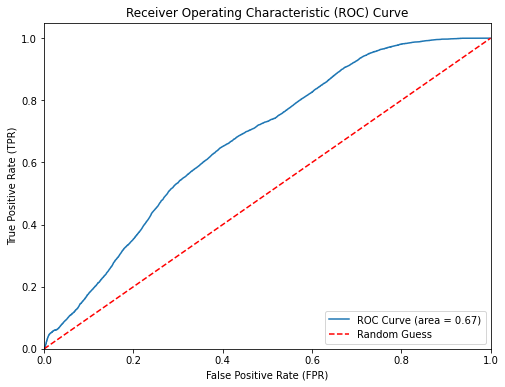

In [83]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [84]:
## В целом, получились неплохие результаты. Давайте подберем гиперпараметры с помощью GridSearch

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
}

model = LogisticRegression(penalty='l2')

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

y_pred = grid_search.predict(X_test)

y_probs = grid_search.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", roc_auc)

Best Parameters: {'C': 0.001}
ROC AUC: 0.6718768435552657


In [37]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.8543939919430141
ROC-AUC: 0.5812323186027294


In [38]:
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote_enn = SMOTEENN()
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')


Accuracy: 0.837432246761851
ROC-AUC: 0.5964109692558945


## Видим, что GridSearch только ухудшил ситуацию. Попробуем другой метод

In [36]:
# Также попробуем другой метод: RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Определяем пространство поиска гиперпараметров
param_dist = {
    'C': uniform(loc=0, scale=100),  # Параметр регуляризации, равномерное распределение от 0 до 100     
}

model = LogisticRegression()

random_search = RandomizedSearchCV(model, param_distributions=param_dist, n_iter=10, cv=5, scoring='roc_auc', random_state=42)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)

y_pred = random_search.predict(X_test)

y_probs = random_search.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC:", roc_auc)


Best Parameters: {'C': 37.454011884736246}
ROC AUC: 0.670856408833328


In [39]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

undersampler = RandomUnderSampler()
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)

clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')


Accuracy: 0.6375718662320974
ROC-AUC: 0.6504866209677085


In [40]:
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote_tomek = SMOTETomek()
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)

clf = RandomForestClassifier()
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')


Accuracy: 0.8617233666967545
ROC-AUC: 0.5776933182288588


In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')


Accuracy: 0.8107489206169936
ROC-AUC: 0.5980963531622026


In [43]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

brf = BalancedRandomForestClassifier()
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')


Accuracy: 0.6167148665521253
ROC-AUC: 0.6749793262515695


In [46]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': brf.feature_importances_
})

# Вывод значимых переменных
print(feature_importance.sort_values(by='Importance', ascending = False))

               Feature  Importance
0  Total duration, sec    0.644971
4                    T    0.309690
2           is_weekend    0.025828
3           Start time    0.017348
1            bike_type    0.002162


## Видим, что результат в целом не зависит от гиперпараметров и типа классификатора. Лучшее качество выдал Balanced Random Forest Classifier, который сбалансировал классы.

# Тестирование гипотез

## Протестируем гипотезу, что в выходные люди берут велосипеды реже, чем в будние дни. Для этого реализуем тест Манна-Уитни. Все тесты будем проводить с уровнем значимости 0.05

In [48]:
from scipy.stats import ttest_ind

# Отфильтруем поездки по выходным и будням
weekday_data = df_trips[df_trips['is_weekend'] == True]
weekend_data = df_trips[df_trips['is_weekend'] == False]

weekday_counts = weekday_data.groupby(weekday_data['Start date'].dt.date).size()
weekend_counts = weekend_data.groupby(weekend_data['Start date'].dt.date).size()

t_statistic, p_value = ttest_ind(weekday_counts, weekend_counts)

print("T-статистика:", t_statistic)
print("P-значение:", p_value)

T-статистика: 5.285209219171423
P-значение: 1.1481826496820934e-05


Видим, что p-value около 0. Следовательно, есть основания отвергнуть гипотезу H0 о равенстве мат.ожиданий. количества поездок в каждый из дней.

## Нулевая гипотеза (H0): Дождь не влияет на среднюю длительность поездки.
## Альтернативная гипотеза (H1): Дождь снижает среднюю длительность поездки.

In [49]:
import pandas as pd
from scipy.stats import ttest_ind

trips_with_rain = df_trips[df_trips['is_rain'] == 1]['Total duration, sec']
trips_without_rain = df_trips[df_trips['is_rain'] == 0]['Total duration, sec']

# Применим t-тест для независимых выборок
t_statistic, p_value = ttest_ind(trips_with_rain, trips_without_rain)

# Интерпретация результатов
alpha = 0.05
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Дождь влияет на среднюю длительность поездки.")
else:
    print("Не отвергаем нулевую гипотезу. Дождь не влияет на среднюю длительность поездки.")


Отвергаем нулевую гипотезу. Дождь влияет на среднюю длительность поездки.


## Нулевая гипотеза (H0): Температура не влияет на длительность поездки.
## Альтернативная гипотеза (H1): Температура влияет на длительность поездки.

In [50]:
import pandas as pd
from scipy.stats import pearsonr

# Вычисляем коэффициент корреляции Пирсона и p-value
corr, p_value = pearsonr(df_trips['T'], df_trips['Total duration, sec'])

# Интерпретация результатов
alpha = 0.05  # Уровень значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу. Температура влияет на длительность поездки.")
else:
    print("Не отвергаем нулевую гипотезу. Температура не влияет на длительность поездки.")

Отвергаем нулевую гипотезу. Температура влияет на длительность поездки.
